In [2]:
img = cv2.imread('Images/eye_face.jpg')

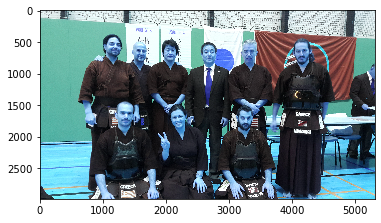

In [3]:
plt.imshow(img)

In [4]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

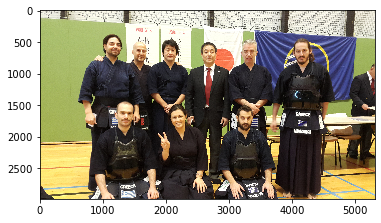

In [5]:
plt.imshow(fix_img)

In [6]:
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [7]:
def detect_eyes(fix_img):
    
    #fix_img = fix_img.copy()
  
    eyes_rects = eye_classifier.detectMultiScale(fix_img) 
    
    
    for (x,y,w,h) in eyes_rects: 
        cv2.rectangle(fix_img, (x, y), (x + w, y + h), (255, 255, 255), 10) 
        
    return fix_img

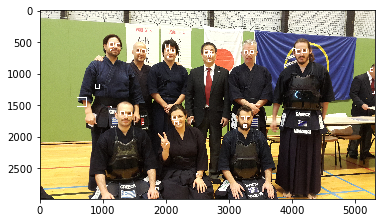

In [8]:
result = detect_eyes(fix_img)
plt.imshow(result)

In [1]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('Images/eye_face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# If no faces are detected, face_classifier returns the print message
if faces is ():
    print("No Face Found")

while True:

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),7)
        #cv2.imshow('img',img)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
            cv2.imshow('Eyes Detection', img)

    if cv2.waitKey(15) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()